# Project: Wrangling and Analyze Data

### Table of Contents
<ul>
<li><a href="#gather">Data Gathering</a></li>
<li><a href="#assess"> Data Assessing</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#store">Data Storage</a></li>
<li><a href="#analysis">Analysis</a></li>
</ul>


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import time
from timeit import default_timer as timer
import json
import re
import seaborn as sns

<a id='gather'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [12]:
# Reading in twitter-archive-enhanced.csv

archives = pd.read_csv('twitter-archive-enhanced.csv')
archives.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [13]:
# Downloading images predictions file using link provided.  

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)
open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [14]:
# Reading in images predictions file

images = pd.read_csv('image_predictions.tsv', sep = '\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [15]:
# Connecting to Twitter API (code provided by Udacity through Tweepy)

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [16]:
# Query API for tweets and match the id to archived id
# NOTE TO REVIEWER: I had mobile verification issues so the following
# Twitter API code was sent by a Udacity instructor

#tweet_ids = archives.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
     #This loop will likely take 20-30 minutes to run because of Twitter's rate limit
 #   for tweet_id in tweet_ids:
  #      count += 1
   #     print(str(count) + ": " + str(tweet_id))
    #    try:
     #       tweet = api.get_status(tweet_id, tweet_mode='extended')
      #      print("Success")
       #     json.dump(tweet._json, outfile)
        #    outfile.write('\n')
        #except tweepy.TweepError as e:
         #   print("Fail")
          #  fails_dict[tweet_id] = e
           # pass
#end = timer()
#print(end - start)
#print(fails_dict)





In [17]:
my_list = []
json_df = pd.DataFrame()
with open('tweet-json.txt', mode='r') as file:
    for ln in file:
        j = json.loads(ln)
        my_list.append({'tweet_id': j['id_str'], 'retweet_count': j['retweet_count'], 'favorite_count': j['favorite_count']})

        
        
        

In [18]:
json_df = pd.DataFrame(my_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
json_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='assess'></a>

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [19]:
archives

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [20]:
images

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [21]:
json_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [22]:
archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [23]:
archives.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [24]:
archives.source.head()

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
3    <a href="http://twitter.com/download/iphone" r...
4    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [25]:
archives.timestamp.head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [26]:
archives.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [27]:
archives.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [28]:
sum(archives.duplicated())

0

In [29]:
archives.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
the           8
Sadie         8
Toby          7
an            7
Buddy         7
Daisy         7
Bailey        7
Milo          6
Oscar         6
Dave          6
Rusty         6
Bella         6
Stanley       6
Jax           6
Scout         6
Koda          6
Leo           6
Jack          6
very          5
           ... 
Danny         1
Snickers      1
Maks          1
Samsom        1
Callie        1
Pumpkin       1
Kayla         1
Meera         1
Filup         1
Ace           1
Tango         1
Beckham       1
Dotsy         1
Jersey        1
Sky           1
Newt          1
Blakely       1
Rooney        1
Jeremy        1
Tonks         1
Iroh          1
Lucia         1
Jarvis        1
Bruiser       1
Arya          1
Ralpher       1
Ziva          1
this          1
O             1
Ito           1
Name: name, Length: 957,

In [30]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [32]:
sum(images.duplicated())

0

In [33]:
images.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [34]:
images.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
teddy                         18
Maltese_dog                   18
Shetland_sheepdog             18
beagle                        18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [35]:
images.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
collie                             27
Pembroke                           27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
Samoyed                            20
miniature_pinscher                 20
chow                               20
malinois                           20
toy_terrier                        20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [36]:
images.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Pembroke                          27
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

In [37]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [38]:
json_df.describe()

,retweet_count,favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [39]:
sum(json_df.duplicated())

0

### Quality issues

1. archives: Incorrect Data Types
       - tweet_id: int 
       - retweet_status_timestamp: object 
       - in_reply_to_status_id, and in_reply_to_user_id: float
       
2. Missing data:
    archives:
        - in_reply_status_id 
        - in_reply_to_user_id
        - retweet_status_id
        - retweet_status_user_id 
        - retweet status_timestamp 
        - doggo 
        - floofer 
        - pupper 
        - puppo

3. archives: Correct incorrect names: None, a, an, the, old

4. archives: Dataset includes retweets.

5. archives: timestamp includes '+0000' at end

6. archives: Standardize rating system

7. images: Incorrect Data Types
        - tweet_id: int

8. images: p1, p2, p3 uses both '-' and '_' to indicate multiple word dog breeds

9. Inconsistent capitalization on images: p1, p2, p3 

10. Remove columns that are not necessary for this analysis.

### Tidiness issues
1. archives: columns doggo, floofer, pupper, and puppo all relate to the same variable. 
2. All three datasets should be merged as they are they related observational units. 



<a id='clean'></a>

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [40]:
archives_clean = archives.copy()
images_clean = images.copy()
tweets_clean = json_df.copy()


### Issue #1:    Remove retweets 

#### Define: 

We would typically start by finding missing data, however for this dataset we need to start by isolating the retweets then removing them from the dataset. This will ensure we only have original tweets. 

#### Code

In [41]:
drop_retweets = archives_clean[pd.notnull(archives_clean['retweeted_status_id'])].index
archives_clean.drop(drop_retweets, inplace=True)

#### Test

In [42]:
archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Issue #2: Remove uncessary columns

#### Define: 
The below columns missing a lot of data and are also not necessary for this analysis and can be removed. 

 - in_reply_to_status_id
 - in_reply_to_user_id
 - source
 - retweeted_status_id
 - retweeted_status_user_id
 - retweeted_status_timestamp

#### Code

In [43]:
archives_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id',
                     'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [44]:
archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Issue #3:  Doggo, floofer, pupper, and puppo columns are the same variable

#### Define: 

Create 1 column that tells whether the dog is a doggo, floofer, pupper, or puppo. Then drop the 3 superfluous columns. 

#### Code

In [45]:
archives_clean['dog_type'] = archives_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

# test to see if it worked
archives_clean[['dog_type', 'doggo', 'floofer', 'pupper', 'puppo']].sample(10)

,dog_type,doggo,floofer,pupper,puppo
2147,NaN,None,None,None,None
311,NaN,None,None,None,None
807,NaN,doggo,None,None,None
1276,NaN,None,None,None,None
1449,pupper,None,None,pupper,None
1429,pupper,None,None,pupper,None
2327,NaN,None,None,None,None
564,NaN,None,None,None,None
1372,NaN,None,None,None,None
2008,NaN,None,None,None,None


In [46]:
archives_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

# Test
archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_type              364 non-null object
dtypes: int64(3), object(5)
memory usage: 152.9+ KB


### Issue #4: Merge data 

#### Define: 

Since all three datasets have related observational units, they should be merged into one table. I will use the tweet_id as the key, so my first step is changing the tweet_ids in the archives to an object.  

#### Code

In [47]:
archives_clean['tweet_id'] = archives_clean['tweet_id'].astype('str')
archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_type              364 non-null object
dtypes: int64(2), object(6)
memory usage: 152.9+ KB


In [48]:
images_clean['tweet_id'] = images_clean['tweet_id'].astype('str')
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [49]:
clean_tweets = archives_clean.merge(tweets_clean, on='tweet_id').merge(images_clean, on='tweet_id')

#### Test

In [50]:
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_type              326 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool

In [51]:
clean_tweets.sample(10)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1668,671896809300709376,2015-12-02 03:40:57 +0000,This is Lola. She fell asleep on a piece of pi...,https://twitter.com/dog_rates/status/671896809...,10,10,Lola,NaN,4519,9016,...,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
454,794332329137291264,2016-11-04 00:15:59 +0000,This is Nimbus (like the cloud). He just bough...,https://twitter.com/dog_rates/status/794332329...,12,10,Nimbus,NaN,3088,10686,...,1,Samoyed,0.988307,True,malamute,0.004906,True,Great_Pyrenees,0.002901,True
683,754856583969079297,2016-07-18 01:53:28 +0000,This is Winnie. She's not a fan of the fast mo...,https://twitter.com/dog_rates/status/754856583...,11,10,Winnie,NaN,2870,7616,...,2,golden_retriever,0.872385,True,Labrador_retriever,0.099963,True,cocker_spaniel,0.006051,True
578,773247561583001600,2016-09-06 19:52:39 +0000,This is Chip. He's a pupholder. Comes with the...,https://twitter.com/dog_rates/status/773247561...,10,10,Chip,NaN,3699,10414,...,1,seat_belt,0.713588,False,miniature_pinscher,0.083369,True,Brabancon_griffon,0.075696,True
693,753294487569522689,2016-07-13 18:26:16 +0000,This is Ace. He's a window washer. One of the ...,https://twitter.com/dog_rates/status/753294487...,11,10,Ace,NaN,1191,3758,...,1,chow,0.194773,True,monitor,0.102305,False,Siberian_husky,0.086855,True
901,720043174954147842,2016-04-13 00:17:25 +0000,This is Neptune. He's a Snowy Swiss Mountain F...,https://twitter.com/dog_rates/status/720043174...,11,10,Neptune,NaN,2253,5332,...,1,Samoyed,0.954517,True,Eskimo_dog,0.029130,True,white_wolf,0.004462,False
626,764259802650378240,2016-08-13 00:38:30 +0000,This is Kota and her son Benedict. She doesn't...,https://twitter.com/dog_rates/status/764259802...,10,10,Kota,NaN,1745,6718,...,1,German_shepherd,0.973677,True,malinois,0.025950,True,kelpie,0.000192,True
1952,666701168228331520,2015-11-17 19:35:19 +0000,This is a golden Buckminsterfullerene named Jo...,https://twitter.com/dog_rates/status/666701168...,8,10,a,NaN,234,449,...,1,Labrador_retriever,0.887707,True,Chihuahua,0.029307,True,French_bulldog,0.020756,True
1408,679062614270468097,2015-12-21 22:15:18 +0000,This is Chompsky. He lives up to his name. 11/...,https://twitter.com/dog_rates/status/679062614...,11,10,Chompsky,NaN,9299,18712,...,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1117,698355670425473025,2016-02-13 03:59:01 +0000,This is Jessiga. She's a Tasmanian McCringlebe...,https://twitter.com/dog_rates/status/698355670...,10,10,Jessiga,NaN,516,2046,...,1,pug,0.990191,True,Pekinese,0.002799,True,sunglasses,0.001310,False


### Issue # 5: Datatypes 

#### Define: 

Most datatypes identified have already been corrected or removed through in solving other issue, however the clean_tweets timestamp remains incorrect. We need to change the datatype from object to datetime. This should also remove the additional '+0000' that is at the end of every timestamp.


#### Code

In [52]:
clean_tweets.timestamp = pd.to_datetime(clean_tweets.timestamp)


#### Test

In [53]:
clean_tweets.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8964,42908,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9774,41048,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [54]:
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_type              326 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-n

### Issue #6: Correct names (when possible)

#### Define: 

It appears that some 'dog names' were scraped incorrectly making it appear that their name is 'a', 'an', 'the' or 'old'. We are going to find those dogs and change their name no 'None'

#### Code

In [55]:
clean_tweets.name = clean_tweets.name.str.replace('^[a-z]+', 'None')

#### Test

In [56]:
clean_tweets.name.value_counts()

None        644
Charlie      11
Lucy         10
Oliver       10
Cooper       10
Tucker        9
Penny         9
Winston       8
Sadie         8
Daisy         7
Lola          7
Toby          7
Bella         6
Bo            6
Koda          6
Jax           6
Stanley       6
Chester       5
Leo           5
Rusty         5
Oscar         5
Dave          5
Bailey        5
Buddy         5
Louis         5
Scout         5
Milo          5
Bentley       4
Finn          4
Chip          4
           ... 
Jameson       1
Dutch         1
Kara          1
Hercules      1
Beya          1
Blakely       1
Newt          1
Sky           1
Jaspers       1
Sid           1
Lucky         1
Thor          1
Harnold       1
Jim           1
Tebow         1
Tyrone        1
Vinscent      1
Rizzy         1
Bruno         1
Jersey        1
Astrid        1
Maya          1
Kulet         1
Meera         1
Pumpkin       1
Levi          1
Tango         1
Beckham       1
Dotsy         1
Ito           1
Name: name, Length: 914,

### Issue #7: Correct rating numerator and denominators 

#### Define: 

Some of the rating_numerators are wrong bacause they have a decimal in the rating. We need to create a for loop to find these instances, then give them the correct rating. Then create a standard rating so we can run analysis on this later, we will do that by dividing the numerator by the denominator. 

#### Code

In [57]:
# Change numerators to float
clean_tweets['rating_numerator'] = clean_tweets['rating_numerator'].astype('float')
clean_tweets['rating_denominator'] = clean_tweets['rating_denominator'].astype('float')
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
dog_type              326 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 n

In [58]:
# For loop to find the tweets with decimals in the ratings
decimal_ratings_text = []
decimal_ratings_index = []
decimal_rating = []

for i, text in clean_tweets['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        decimal_ratings_text.append(text)
        decimal_ratings_index.append(i)
        decimal_rating.append(re.search('\d+\.\d+\/\d+', text).group())

print(decimal_ratings_text)
print(decimal_ratings_index)
print(decimal_rating)

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948', "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS", "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq", 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']
[39, 503, 553, 1374]
['13.5/10', '9.75/10', '11.27/10', '11.26/10']


In [59]:
# isolate the numerator and convert it to a float
numerator = [float(i[:-3]) for i in decimal_rating]
numerator

[13.5, 9.75, 11.27, 11.26]

In [60]:
# Change the rating numerator to the correct decimal value, and print out result to test that it worked.

clean_tweets.loc[decimal_ratings_index[0],'rating_numerator'] = numerator[0]
clean_tweets.loc[decimal_ratings_index[1],'rating_numerator'] = numerator[1]
clean_tweets.loc[decimal_ratings_index[2],'rating_numerator'] = numerator[2]
clean_tweets.loc[decimal_ratings_index[3],'rating_numerator'] = numerator[3]

print(clean_tweets.loc[39])
print(clean_tweets.loc[503])
print(clean_tweets.loc[553])
print(clean_tweets.loc[1374])

tweet_id                                             883482846933004288
timestamp                                           2017-07-08 00:28:19
text                  This is Bella. She hopes her smile made you sm...
expanded_urls         https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                   13.5
rating_denominator                                                   10
name                                                              Bella
dog_type                                                            NaN
retweet_count                                                     10407
favorite_count                                                    46860
jpg_url                 https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg
img_num                                                               1
p1                                                     golden_retriever
p1_conf                                                        0

In [61]:
# Create standard rating system by dividing rating_numerator and rating_denominator and storing it into a new column

clean_tweets['total_rating'] = clean_tweets['rating_numerator'] / clean_tweets['rating_denominator']


#### Test

In [62]:
clean_tweets.total_rating.describe()

count    1994.000000
mean        1.164875
std         4.064302
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: total_rating, dtype: float64

In [63]:
clean_tweets.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,total_rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,8853,39467,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1.3
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6514,33819,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1.3
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4328,25461,...,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8964,42908,...,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1.3
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,9774,41048,...,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2


### Issue #8: Correct inconsistent uses on underscore and hyphen

#### Define: 

Columns p1, p2, p3, use both '-', and '_' to indicate dog breeds that have multiple words. We want to use a '_' throughout the dataset for consistency.  

#### Code: 

In [64]:
clean_tweets['p1'] = clean_tweets['p1'].replace('-', '_')
clean_tweets['p2'] = clean_tweets['p2'].replace('-', '_')
clean_tweets['p3'] = clean_tweets['p3'].replace('-', '_')

#### Test: 

In [65]:
clean_tweets.p1.value_counts()

golden_retriever             139
Labrador_retriever            95
Pembroke                      88
Chihuahua                     79
pug                           54
chow                          41
Samoyed                       40
toy_poodle                    38
Pomeranian                    38
malamute                      29
cocker_spaniel                27
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            22
seat_belt                     21
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     19
Shetland_sheepdog             18
Eskimo_dog                    18
Maltese_dog                   18
teddy                         18
Shih-Tzu                      17
Rottweiler                    17
Cardigan                      17
beagle                        17
kuvasz                        16
Lakeland_terrier              16
Italian_greyhound             16
web_site                      15
          

In [66]:
clean_tweets.p2.value_counts()

Labrador_retriever                96
golden_retriever                  82
Cardigan                          72
Chihuahua                         43
Chesapeake_Bay_retriever          40
French_bulldog                    39
Pomeranian                        39
toy_poodle                        36
Siberian_husky                    33
miniature_poodle                  32
cocker_spaniel                    32
beagle                            28
Eskimo_dog                        27
collie                            26
Pembroke                          25
kuvasz                            24
Italian_greyhound                 22
Pekinese                          21
American_Staffordshire_terrier    20
miniature_pinscher                20
malinois                          20
chow                              20
Samoyed                           19
Norwegian_elkhound                19
Boston_bull                       19
toy_terrier                       19
Staffordshire_bullterrier         18
p

In [67]:
clean_tweets.p1.value_counts()

golden_retriever             139
Labrador_retriever            95
Pembroke                      88
Chihuahua                     79
pug                           54
chow                          41
Samoyed                       40
toy_poodle                    38
Pomeranian                    38
malamute                      29
cocker_spaniel                27
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            22
seat_belt                     21
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     19
Shetland_sheepdog             18
Eskimo_dog                    18
Maltese_dog                   18
teddy                         18
Shih-Tzu                      17
Rottweiler                    17
Cardigan                      17
beagle                        17
kuvasz                        16
Lakeland_terrier              16
Italian_greyhound             16
web_site                      15
          

### Issue #9: Correct inconsistent capitalization

#### Define: 

Columns p1, p2, p3 has inconsistent capitalization. For this dataset we are going to have all of the lowercase. 

#### Code: 

In [68]:
clean_tweets['p1'] = clean_tweets['p1'].apply(str.lower)
clean_tweets['p2'] = clean_tweets['p2'].apply(str.lower)
clean_tweets['p3'] = clean_tweets['p3'].apply(str.lower)

#### Test: 

In [69]:
clean_tweets.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,total_rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,8853,39467,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1.3
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,6514,33819,...,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,1.3
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,NaN,4328,25461,...,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,NaN,8964,42908,...,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,1.3
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,NaN,9774,41048,...,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,1.2


<a id='store'></a>

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [70]:
clean_tweets.to_csv('twitter_archive_master.csv', index=False)


<a id='analysis'></a>

## Analyzing and Visualizing Data

#### Question 1: Does the higher total rating given in the tweet reflect the popularity of the tweet?


In [71]:
clean_tweets.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf,total_rating
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1.994000e+03,1.994000e+03,1994.000000
mean,12.237101,10.532096,2766.753260,8895.725677,1.203109,0.593941,1.344195e-01,6.024848e-02,1.164875
std,41.471197,7.320710,4674.698447,12213.193181,0.560777,0.271954,1.006807e-01,5.089067e-02,4.064302
min,0.000000,2.000000,16.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000
25%,10.000000,10.000000,624.750000,1982.000000,1.000000,0.362857,5.393988e-02,1.619283e-02,1.000000
50%,11.000000,10.000000,1359.500000,4136.000000,1.000000,0.587635,1.174550e-01,4.950530e-02,1.100000
75%,12.000000,10.000000,3220.000000,11308.000000,1.000000,0.846285,1.951377e-01,9.159438e-02,1.200000
max,1776.000000,170.000000,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,177.600000


In [72]:
possible_rating_outliers = clean_tweets[(clean_tweets['total_rating'] > 2)]
possible_rating_outliers

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,total_rating
385,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,NaN,1655,5927,...,golden_retriever,0.871342,True,tibetan_mastiff,0.036708,True,labrador_retriever,0.025823,True,3.428571
726,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,NaN,2772,5569,...,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,177.600000
1718,670842764863651840,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10.0,None,NaN,4324,7989,...,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,42.000000


In [80]:
tweets_no_out = clean_tweets[(clean_tweets['total_rating'] <= 2)]
tweets_no_out.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf,total_rating
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1.991000e+03,1.991000e+03,1991.000000
mean,11.140522,10.534405,2766.526871,8899.343044,1.203415,0.594082,1.345157e-01,6.027009e-02,1.054612
std,8.624455,7.325779,4678.024127,12221.969511,0.561144,0.271856,1.007215e-01,5.092272e-02,0.218805
min,0.000000,2.000000,16.000000,81.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000
25%,10.000000,10.000000,623.500000,1976.000000,1.000000,0.362880,5.397835e-02,1.614795e-02,1.000000
50%,11.000000,10.000000,1350.000000,4127.000000,1.000000,0.587764,1.175660e-01,4.948690e-02,1.100000
75%,12.000000,10.000000,3220.000000,11321.000000,1.000000,0.845942,1.953115e-01,9.164355e-02,1.200000
max,204.000000,170.000000,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,1.400000


In [83]:
top_retweeted = tweets_no_out[(tweets_no_out['retweet_count'] > 3220)]
top_retweeted.total_rating.describe()

count    497.000000
mean       1.193520
std        0.159736
min        0.000000
25%        1.100000
50%        1.200000
75%        1.300000
max        1.400000
Name: total_rating, dtype: float64

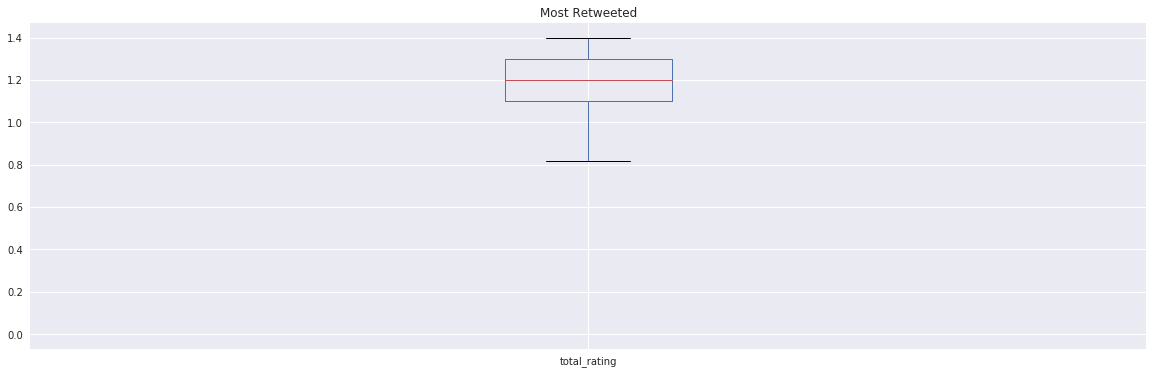

In [101]:
top_retweeted.total_rating.plot(kind='box', title='Most');

In [85]:
most_favorite = tweets_no_out[(tweets_no_out['favorite_count'] > 11308)]
most_favorite.total_rating.describe()

count    499.000000
mean       1.210981
std        0.139897
min        0.000000
25%        1.200000
50%        1.200000
75%        1.300000
max        1.400000
Name: total_rating, dtype: float64

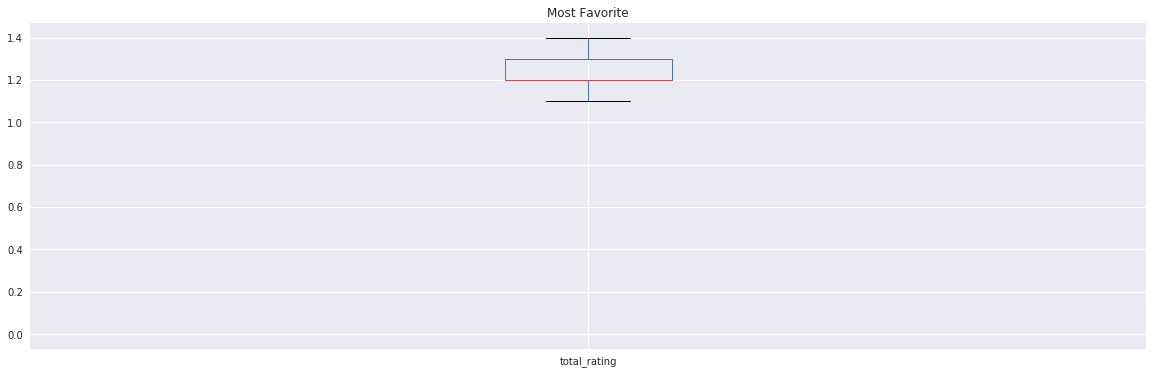

In [100]:
most_favorite.total_rating.plot(kind='box', title='Most Favorite');

In [87]:
best_of_the_best = tweets_no_out[(tweets_no_out['favorite_count'] > 11308) & (tweets_no_out['retweet_count'] > 3220) & (tweets_no_out['total_rating'] >= 1.05)]
best_of_the_best.describe()


,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf,total_rating
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,3.950000e+02,395.000000
mean,12.565823,10.151899,8208.754430,26646.546835,1.392405,0.639192,0.128136,5.393859e-02,1.238354
std,3.701347,3.018928,7776.315042,16493.939317,0.787235,0.262782,0.099653,4.757121e-02,0.084623
min,11.000000,10.000000,3224.000000,11310.000000,1.000000,0.063152,0.000023,5.595040e-07,1.100000
25%,12.000000,10.000000,4268.000000,16488.000000,1.000000,0.427118,0.045100,1.232975e-02,1.200000
50%,12.000000,10.000000,5812.000000,22453.000000,1.000000,0.673664,0.110658,4.122050e-02,1.200000
75%,13.000000,10.000000,8726.500000,30718.500000,1.000000,0.887903,0.189524,8.312790e-02,1.300000
max,84.000000,70.000000,79515.000000,132810.000000,4.000000,0.999953,0.451038,2.331620e-01,1.400000


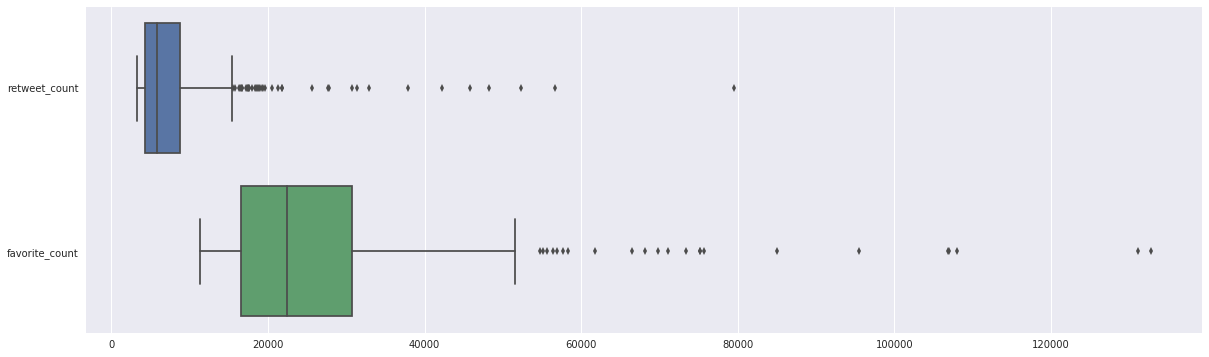

In [99]:
sns.set(rc={'figure.figsize':(20,6)})
a = sns.boxplot(data = best_of_the_best,
               order = ['retweet_count', 'favorite_count'], 
               orient = 'h')

plt.show()

In [89]:
best_of_r_count = best_of_the_best[best_of_the_best['total_rating'] >= 1.2].count().total_rating
total_r_count = tweets_no_out[tweets_no_out['total_rating'] >= 1.2].count().total_rating      

print('The count of the tweets that have a rating over 1.2 is {}, the count of the best of the best tweets over 1.2 is {}.'.format(total_r_count, best_of_r_count))


The count of the tweets that have a rating over 1.2 is 751, the count of the best of the best tweets over 1.2 is 328.


#### Question 2: What is the most popular dog type?


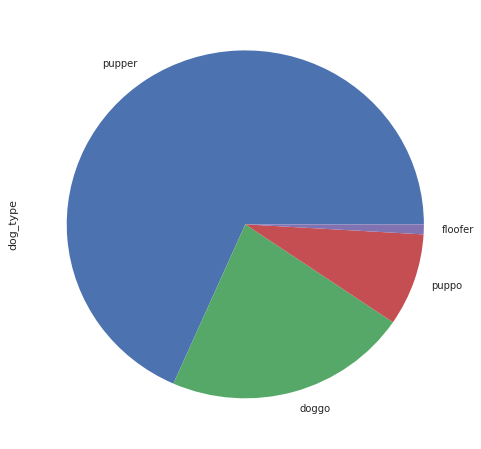

In [90]:
tweets_no_out.dog_type.value_counts().plot(kind='pie', figsize=(8, 8));


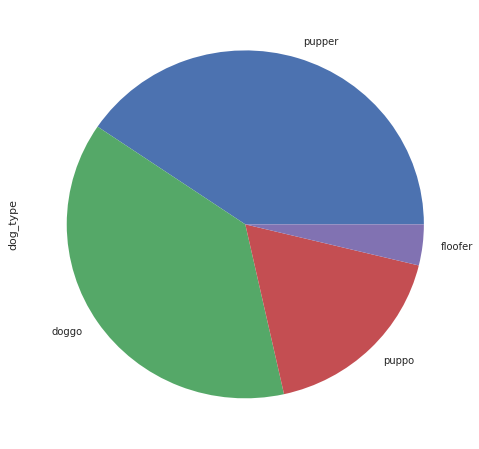

In [91]:
best_of_the_best.dog_type.value_counts().plot(kind='pie', figsize=(8, 8));

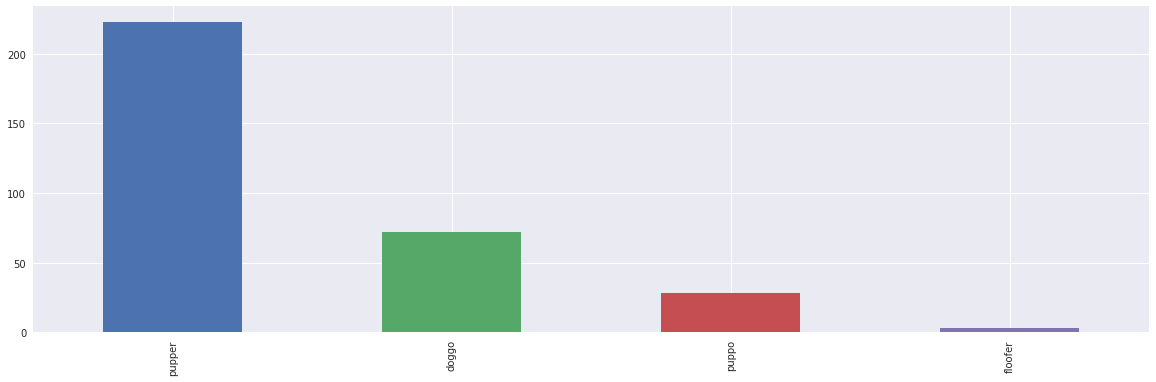

In [92]:
tweets_no_out.dog_type.value_counts().plot(kind='bar');

In [93]:
most_favorite.dog_type.value_counts()

doggo      38
pupper     35
puppo      17
floofer     3
Name: dog_type, dtype: int64

In [94]:
top_retweeted.dog_type.value_counts()

pupper     45
doggo      34
puppo      15
floofer     3
Name: dog_type, dtype: int64

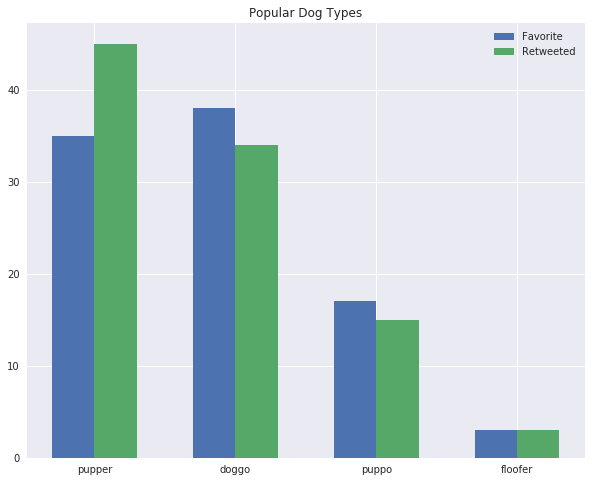

In [95]:
sns.set(rc={'figure.figsize':(10, 8)})
labels = ['pupper', 'doggo', 'puppo', 'floofer']

fave = [35, 38, 17, 3]
retweet = [45, 34, 15, 3]

x = np.arange(len(labels))
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
fave = ax.bar(x - width/2, fave, width, label='Favorite')
retweet = ax.bar(x + width/2, retweet, width, label='Retweeted')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Popular Dog Types')
ax.set_xticks(x)
ax.set_xticklabels(labels)


ax.legend()

plt.show();

#### Question 3: What is the most popular dog name?

In [96]:
tweets_no_out['name'].value_counts()

None        643
Charlie      11
Cooper       10
Oliver       10
Lucy         10
Penny         9
Tucker        9
Winston       8
Sadie         8
Lola          7
Daisy         7
Toby          7
Koda          6
Bella         6
Stanley       6
Bo            6
Jax           6
Rusty         5
Bailey        5
Dave          5
Oscar         5
Chester       5
Louis         5
Scout         5
Buddy         5
Leo           5
Milo          5
Cassie        4
Reggie        4
Maggie        4
           ... 
Tripp         1
Jameson       1
Dutch         1
Kara          1
Hercules      1
Newt          1
Sky           1
Jersey        1
Rizzy         1
Skittles      1
Sid           1
Lucky         1
Thor          1
Harnold       1
Jim           1
Tebow         1
Tyrone        1
Vinscent      1
Jaspers       1
Dotsy         1
Bruno         1
Astrid        1
Maya          1
Kulet         1
Meera         1
Pumpkin       1
Levi          1
Tango         1
Beckham       1
Ito           1
Name: name, Length: 914,

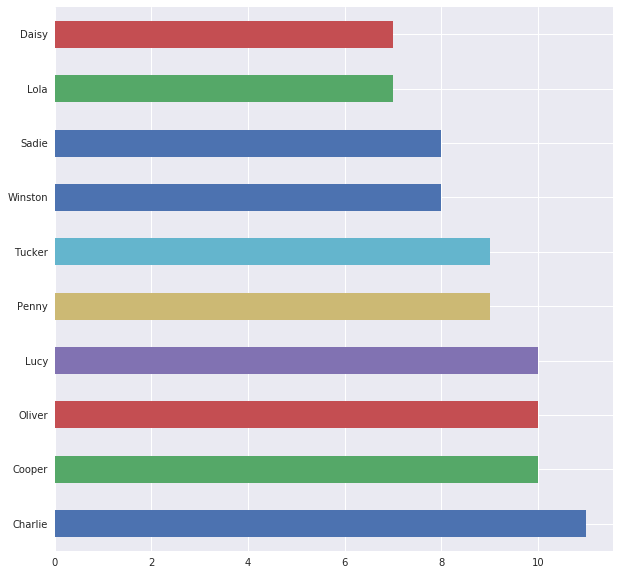

In [97]:
# 'None' is the most listed dog name with ~650 accounts. As such, I filtered this out of the results.
sns.set(rc={'figure.figsize':(10, 10)})
tweets_no_out['name'].value_counts()[1:11].plot(kind='barh');

### Insights

1. Even though the whole point of WeRateDogs is to rate dogs, their ratings are not entirely indicative of the populartiy of the tweet. 

2. Puppers are the most tweeted dog type on WeRateDogs, but when you look at the top 25% we can see that doggos make up a much larger portion of the distribution and are the most 'Favorite'.

3. Charlie is the most popular dog name, followed by Cooper, Oliver, and Lucy.

